# Analiza i Bazy Danych
## Karol Musiał, grupa 3a
### Laboratorium 7
## "Modele Liniowe"

In [28]:
# Import Modułów
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report
import numpy as np

In [ ]:
def linear_reg(name, X_name, y_name):
    
    # Odczytanie danych
    data = pd.read_csv(name)
    DF = pd.DataFrame(data)

    # Wstępny wykres
    DF.plot.scatter(x=X_name,y=y_name,marker='o')
    plt.suptitle('Wykres wstepny')
    plt.show()

    # Dzielenie na podzbiory
    X = DF[X_name]
    y = DF[y_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, train_size=0.3)
    X_train = np.array(X_train).reshape(-1, 1)
    X_test = np.array(X_test).reshape(-1, 1)
    y_train = np.array(y_train).reshape(-1, 1)
    y_test = np.array(y_test).reshape(-1, 1)

    # Tworzenie modelu
    model1 = LinearRegression()
    model1.fit(X_train, y_train)

    # Wypisywanie wskaznikow
    print("\nCoef = {a}".format(a=model1.coef_))
    print("Intercept = {a}\n".format(a=model1.intercept_))
    # Coef to współczynniki wielomianu opisującego zmienne zależne i niezależne
    # Intercept to wartości zmiennych niezależnych dla zmiennych zależnych równych 0
    # W interpretacji geometrycznej, coef to nachylenie prostej, a intercept to miejsce przecięcia z osią Y

    # Predykcja czesci testowej
    y_pred = model1.predict(X_test)
    print("Roznica miedzy predykcja a rzeczywistym wynikiem : \n{a}\n".format(a=(y_pred - y_test).T))

    # Wykresy
    plt.scatter(X_test, y_test, label='y_test')
    plt.plot(X_test, y_pred, 'r', label='y_pred')
    plt.legend()
    plt.suptitle('Regresja liniowa')
    plt.show()

    # Walidacja danych
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('\nŚredni błąd bezwzględny = {a}'.format(a=mae))
    print('Błąd średniokwadratowy = {a}'.format(a=mse))
    print('Pierwiastek błędu średniokwadratowego = {a}'.format(a=rmse))
    

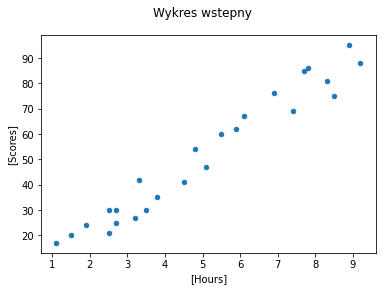


Coef = [[9.38345951]]
Intercept = [3.3546685]

Roznica miedzy predykcja a rzeczywistym wynikiem : 
[[-3.28292039  8.11407433 -8.13254187 -3.32352604  4.58023629 -5.0363042
  -9.45434733  3.69000918 -9.39269328  5.81331727  1.68249599  0.23738243
  -3.18668273 -1.30999082 -6.40622849  6.19677678 -5.60472585 -2.57014223]]



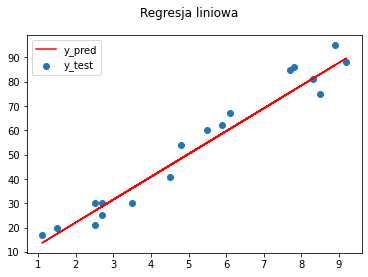


Średni błąd bezwzględny = 4.889688639086433
Błąd średniokwadratowy = 30.96541701931114
Pierwiastek błędu średniokwadratowego = 5.564657852852333


In [21]:
linear_reg('SCORES.csv', ['Hours'], ['Scores'])
#linear_reg('SBP.csv', ['Age'], ['SBP'])

In [22]:
def multiple_linear_reg(name, X_name, y_name):
    
    # Odczytanie danych
    data = pd.read_csv(name)
    DF = pd.DataFrame(data)
    
    # Dzielenie na podzbiory
    X = DF[X_name]
    y = DF[y_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, train_size=0.3, random_state=0)
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    
    # Tworzenie modelu
    model2 = LinearRegression()
    model2.fit(X_train, y_train)
    
    # Wypisywanie wskaznikow
    print("\nCoef = {a}".format(a=model2.coef_))
    print("Intercept = {a}\n".format(a=model2.intercept_))
    
    # Predykcja czesci testowej
    y_pred = model2.predict(X_test)
    print("Roznica miedzy predykcja a rzeczywistym wynikiem : \n{a}\n".format(a=(y_pred - y_test).T))
    
    # Walidacja danych
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('\nŚredni błąd bezwzględny = {a}'.format(a=mae))
    print('Błąd średniokwadratowy = {a}'.format(a=mse))
    print('Pierwiastek błędu średniokwadratowego = {a}'.format(a=rmse))

In [23]:
multiple_linear_reg('PETROL.csv', ['Podatek_paliwowy', 'Sredni_przychod', 'Utwardzone_autostrady', 'Procent_ludnosci_z_prawem_jazdy'], ['Zuzycie_paliwa'])


Coef = [[-4.25828099e+01 -9.64961393e-02 -3.99171321e-03  1.64357272e+03]]
Intercept = [416.46906213]

Roznica miedzy predykcja a rzeczywistym wynikiem : 
[[-56.53894144 133.70319583  45.21448396  19.95133347 127.18200174
  -24.00953873  34.83707906 112.4370323   14.52880253 -80.52120946
  -62.29198939  59.59920747  27.74487434  10.43352587  47.25948598
   46.20751342 101.48961601 -35.35073673 -11.42163915  -0.8382952
  -73.22786833  15.68872903 -23.97602992  84.60025504  48.02046464
   17.90129456  73.91179262 -16.67947407 -48.68234524 -85.71483082
  127.93200902 101.09194119 132.37155398  49.4955237 ]]


Średni błąd bezwzględny = 57.3780768898788
Błąd średniokwadratowy = 4798.872014755159
Pierwiastek błędu średniokwadratowego = 69.2738912921395


In [24]:
# 2. Import Danych
data = pd.read_csv('HEART.csv')
DF = pd.DataFrame(data)
print(DF.head())

# 3. Przetworzenie danych
DF = DF.replace('?', np.nan)
del DF['slope']
del DF['ca']
del DF['thal']
print(DF.head())

DF = DF.dropna()
print(DF.head())

   age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak slope ca  \
0   28    1   2      130  132   0       2     185     0      0.0     ?  ?   
1   29    1   2      120  243   0       0     160     0      0.0     ?  ?   
2   29    1   2      140    ?   0       0     170     0      0.0     ?  ?   
3   30    0   1      170  237   0       1     170     0      0.0     ?  ?   
4   31    0   2      100  219   0       1     150     0      0.0     ?  ?   

  thal  num         
0    ?           0  
1    ?           0  
2    ?           0  
3    6           0  
4    ?           0  
   age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak  num       
0   28    1   2      130  132   0       2     185     0      0.0           0
1   29    1   2      120  243   0       0     160     0      0.0           0
2   29    1   2      140  NaN   0       0     170     0      0.0           0
3   30    0   1      170  237   0       1     170     0      0.0           0
4   31    0   2      100  

In [25]:
#4. 
DF = pd.get_dummies(DF, columns=['cp', 'restecg'], drop_first=True)
DF



,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_2,cp_3,cp_4,restecg_1,restecg_2
0,28,1,130,132,0,185,0,0.0,0,1,0,0,0,1
1,29,1,120,243,0,160,0,0.0,0,1,0,0,0,0
3,30,0,170,237,0,170,0,0.0,0,0,0,0,1,0
4,31,0,100,219,0,150,0,0.0,0,1,0,0,1,0
5,32,0,105,198,0,165,0,0.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,160,331,0,94,1,2.5,1,0,0,1,0,0
290,54,0,130,294,0,100,1,0.0,1,0,1,0,1,0
291,56,1,155,342,1,150,1,3.0,1,0,0,1,0,0
292,58,0,180,393,0,110,1,1.0,1,1,0,0,0,0


In [26]:
X = DF[DF.columns[0:8]]
X2 = DF[DF.columns[9:]]
X = X.join(X2)
y = DF[DF.columns[8]]


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, train_size=0.2, random_state=0)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Tworzenie modelu
LRM = LogisticRegression()
LRM.fit(X_train, y_train)

# Wypisywanie wskaznikow
print("\nCoef = {a}".format(a=LRM.coef_))
print("Intercept = {a}\n".format(a=LRM.intercept_))

# Predykcja czesci testowej
y_pred = LRM.predict(X_test)
print("Roznica miedzy predykcja a rzeczywistym wynikiem : \n{a}\n".format(a=(y_pred - y_test).T))

# Walidacja danych
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
cr = classification_report(y_test, y_pred)
print('\nŚredni błąd bezwzględny = {a}'.format(a=mae))
print('Błąd średniokwadratowy = {a}'.format(a=mse))
print('Pierwiastek błędu średniokwadratowego = {a}\n'.format(a=rmse))
print('Raport:\n{a}'.format(a=cr))


Coef = [[ 1.06119082e-03  1.16399834e+00  8.47498334e-04  1.45160735e-03
  -2.48385875e-01 -1.61033479e-02  1.01599665e+00  5.84925852e-01
  -6.54222255e-01  2.70055751e-01  2.84166605e-01 -4.39319143e-02
   0.00000000e+00]]
Intercept = [-0.06917435]

Roznica miedzy predykcja a rzeczywistym wynikiem : 
[-1  0  0  0  0  0  0  0  0  1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  1  0  0  1 -1  0  0  0  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0
  0  0  0  0  0  1  1  1  1  0  0  0  0  0  0  0  0 -1  1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0 -1  0  0  0  0  0  0 -1  1
  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0 -1 -1  0  0
  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0 -1  0  1  0
 -1  0  0  1  0 -1 -1  0  0  0 -1  0  0  0  0  0  0]


Średni błąd bezwzględny = 0.1674641148325359
Błąd średni

/home/user/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
